<a href="https://colab.research.google.com/github/Kei-Kobayash/practice_machine_learning/blob/main/ml_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cinema.csv")

## Data check


In [7]:
df.head()

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286


In [10]:
df.shape

df.value_counts()

df.isnull().any(axis=0)
df.isnull().sum()


cinema_id    0
SNS1         1
SNS2         0
actor        1
original     0
sales        0
dtype: int64

In [36]:
df2 = df.fillna(df.mean())
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

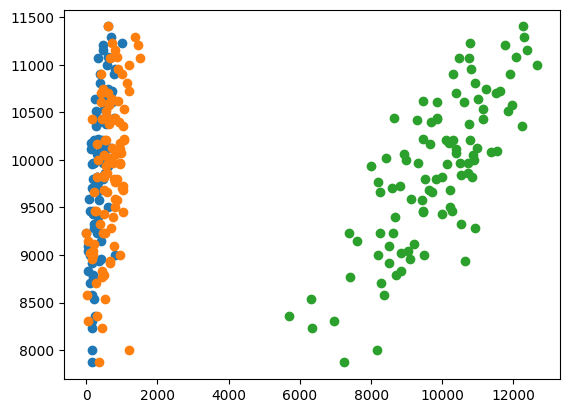

In [38]:
for i in ["SNS1", "SNS2", "actor"]:
  plt.scatter(df2[i], df2["sales"])

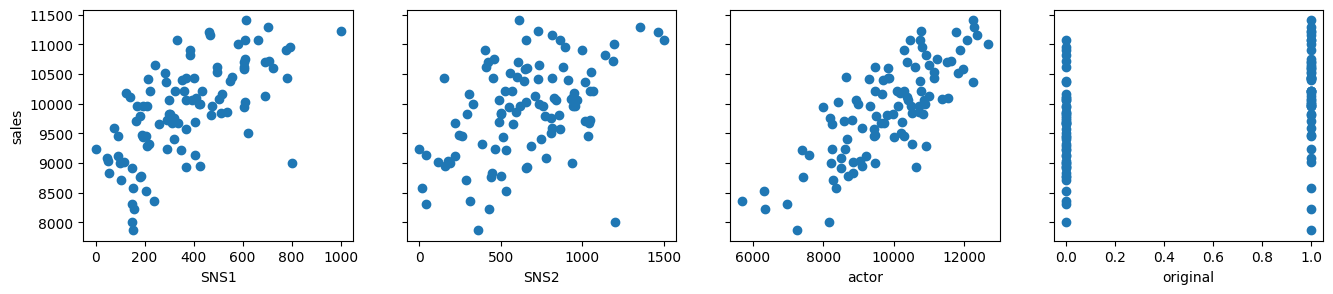

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 3))

features = ["SNS1", "SNS2", "actor", "original"]

for i, feature in enumerate(features):
  if i != 0:
    ax[i].set_yticklabels([])
  ax[i].scatter(df2[feature], df2["sales"])
  ax[i].set_xlabel(feature)
  ax[i].set_ylabel("sales" if i ==0 else "")


### outlier

In [52]:
no = df2[(df2["SNS2"] > 1000) & (df2["sales"] < 8500)].index
df3 = df2.drop(no, axis=0)

## Feature and ground truth

In [53]:
x = df3.loc[:, "SNS1":"original"]
t = df3["sales"]

from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [54]:
from pandas.core.internals.construction import maybe_infer_to_datetimelike
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, t_train)

LinearRegression()

In [56]:
new = [[150, 700, 300, 0]]
model.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

## R^2 決定計数

In [58]:
model.score(x_test, t_test)

0.790388159657009

In [59]:
print(model.coef_)
print(model.intercept_)

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438708


In [63]:
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp.columns = ["coefficient"]

tmp

,coefficient
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845
